<div style="text-align: center;">
  <img src="Images/Depressed_Student.png" alt="Depressed Student Illustration" width="600"/>
</div>

## Hello! 
This is a project to predict **Student Depression** using the [Student Depression Dataset](https://www.kaggle.com/datasets/hopesb/student-depression-dataset/data) from Kaggle. Understanding and predicting depression among students is an essential task, as mental health plays a critical role in their academic performance and overall well-being.  

Student depression datasets are typically used to analyze and predict depression levels among students. This project can contribute to identifying factors influencing student mental health and designing early intervention strategies.

The dataset provides comprehensive information about students and their mental health status, with 18 columns and 27,901 rows, structured in a CSV format. Below is a brief explanation of the columns:  

1. **id**: A unique identifier for each student.  
2. **Gender**: The gender of the student.  
3. **Age**: The age of the student.  
4. **City**: The city where the student resides.  
5. **Profession**: The student's occupation, such as student, part-time worker, etc.  
6. **Academic Pressure**: The level of academic stress experienced by the student.  
7. **Work Pressure**: The work-related stress experienced by the student.  
8. **CGPA**: The student’s cumulative grade point average.  
9. **Study Satisfaction**: The student’s level of satisfaction with their studies.  
10. **Job Satisfaction**: The student’s level of satisfaction with their job or part-time work.  
11. **Sleep Duration**: Average sleep duration in hours per day.  
12. **Dietary Habits**: The dietary pattern of the student (e.g., healthy or unhealthy).  
13. **Degree**: The current level of education the student is pursuing.  
14. **Have you ever had suicidal thoughts?**: A binary column (Yes/No) indicating if the student has had suicidal thoughts.  
15. **Work/Study Hours**: The number of hours spent working or studying per day.  
16. **Financial Stress**: The financial burden or stress experienced by the student.  
17. **Family History of Mental Illness**: A binary column (Yes/No) indicating if the student has a family history of mental health issues.  
18. **Depression**: The target variable, indicating whether the student is experiencing depression (Yes/No).  

> ⚠️ *Disclaimer*: This dataset, given its sensitive nature, must be used responsibly, ensuring ethical considerations like privacy, informed consent, and data anonymization. This project aims to leverage this dataset to build a model capable of predicting depression status in students and identifying significant contributing factors.

# **Step 5: Modeling & Prediction**

In this step, we build machine learning models to predict student depression using the cleaned and preprocessed dataset. This includes training, evaluating, tuning models, and analyzing important features.

---

### Objectives of This Notebook

1. [Import Libraries and Load the Dataset](#import)  
2. [Split the Dataset into Features and Target](#split)  
3. [Feature Engineering](#engineering)  
4. [Train and Evaluate Models](#models)  
   - [Logistic Regression](#logistic-regression)
   - [Decision Tree Classifier](#decision-tree)
   - [Gradient Boosting Classifier](#gradient-boosting)  
5. [Hyperparameter Tuning](#tuning)  
   - [Logistic Regression Metrics](#lr-metrics)  
   - [Decision Tree Metrics](#tree-metrics)  
   - [Gradient Boosting Metrics](#gb-metrics)  
6. [Model Evaluation and Comparison](#evaluation)  

---

### Previous Step

- Step 4: [Excel Dashboard](./04_excel_dashboard.xlsx)

---

<a id="import"></a>

## **5.1 Import Libraries and Load the Dataset**

We begin by importing essential libraries for data processing, modeling, and evaluation. The cleaned dataset is then loaded into a DataFrame.

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [2]:
# Standard Scaler allows us to standardize our features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Allows us to split the data into training and test sets, and also perform cross-validation
from sklearn.model_selection import train_test_split, cross_val_score

# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Gradient Boosting classification algorithm that combines multiple weak learners into a strong learner
from sklearn.ensemble import GradientBoostingClassifier

# Tools for evaluating model performance with metrics like confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

# Additional metrics for evaluating accuracy, precision, recall, and F1 score of models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Used to visually display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Importing RandomizedSearchCV and GridSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
# Load the dataset
print("Previewing the raw dataset:")
df = pd.read_csv("student_depression_encoded.csv")
display(df.head())

Previewing the raw dataset:


,academic_pressure,study_satisfaction,dietary_habits,degree,suicidal_thoughts,financial_stress,depression
0,5.0,2.0,2,1,1,1.0,1
1,2.0,5.0,1,1,0,2.0,0
2,3.0,5.0,2,1,0,1.0,0
3,3.0,2.0,1,1,1,5.0,1
4,4.0,3.0,1,2,1,1.0,0


---

<a id="split"></a>  

## **5.2 Split the Dataset into Features and Target**  

The dataset is divided into independent variables (features) and the dependent variable (`depression`) for model training.


In [4]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns='depression', axis=1)
y = df['depression']

---

<a id="engineering"></a>  

## **5.3 Feature Engineering** 

This section handles data transformations to improve model performance.

In [5]:
# Standardize the features using StandardScaler
scaler = StandardScaler()

# Fit and transform the features using StandardScaler
scaled = scaler.fit_transform(X)

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=23)

In [7]:
# Print the shapes of the full dataset and the resulting splits
print(f'Data shape for X: {X.shape} \
    \nData shape for y: {y.shape} \
        \nData shape for X_train: {X_train.shape} \
            \nData shape for X_test: {X_test.shape} \
                \nData shape for y_train: {y_train.shape} \
                    \nData shape for y_test: {y_test.shape}')

Data shape for X: (27814, 6)     
Data shape for y: (27814,)         
Data shape for X_train: (22251, 6)             
Data shape for X_test: (5563, 6)                 
Data shape for y_train: (22251,)                     
Data shape for y_test: (5563,)


#### Now the data is ready for Modelling

---

<a id="models"></a>  

## **5.4 Train and Evaluate Models**  

Train three different classifiers and evaluate their initial performance.

<a id="logistic-regression"></a>  

### **5.4.1 Logistic Regression**  

A statistical model that estimates the probability of a binary outcome.

In [8]:
# Instantiate the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Fit the model to the training data
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [9]:
# Evaluate model performance
# Check training accuracy to detect underfitting
lr_train_score = lr.score(X_train, y_train)

# Check test accuracy to assess generalization
lr_test_score = lr.score(X_test, y_test)

# Use 5-fold cross-validation to assess overall model stability
lr_average_score = cross_val_score(lr, X, y, cv=5, scoring='accuracy').mean()

In [10]:
# Display accuracy scores
print("Training Set Score for LR:", lr_train_score)
print("Test Set Score for LR:", lr_test_score)
print("Average Cross-Validation Score for LR:", lr_average_score)

Training Set Score for LR: 0.8347040582445733
Test Set Score for LR: 0.8392953442387201
Average Cross-Validation Score for LR: 0.8355505822844635


#### Logistic Regression Training and Validation Metrics:

Training Set Score: The model achieved a training accuracy of 83.47%, indicating that it fits the training data well.

Test Set Score: With a test accuracy of 83.93%, the model demonstrates consistent performance on unseen data.

Average Cross-Validation Score: The cross-validation score of 83.56% highlights the model's robustness and generalizability across different data splits.

Conclusion: Logistic Regression shows consistent performance across training, testing, and cross-validation, indicating a well-generalized model with minimal overfitting or underfitting.

In [11]:
# Predict outcomes using the test set
lr_pred = lr.predict(X_test)

# Generate and display a detailed classification report
print(f'Classification Report for Logistic Regression Prediction = \
    \n{classification_report(y_test, lr_pred)}')

Classification Report for Logistic Regression Prediction =     
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2286
           1       0.85      0.88      0.87      3277

    accuracy                           0.84      5563
   macro avg       0.84      0.83      0.83      5563
weighted avg       0.84      0.84      0.84      5563



In [12]:
# Calculate evaluation metrics for each class
lr_precision_not_Depressed = precision_score(y_test, lr_pred, pos_label=0)
lr_precision_Depressed = precision_score(y_test, lr_pred, pos_label=1)
lr_recall_not_Depressed = recall_score(y_test, lr_pred, pos_label=0)
lr_recall_Depressed = recall_score(y_test, lr_pred, pos_label=1)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1_not_Depressed = f1_score(y_test, lr_pred, pos_label=0)
lr_f1_Depressed = f1_score(y_test, lr_pred, pos_label=1)

# Print the metrics in a structured format
print(f"Logistic Regression Predictions - \
    \nAccuracy: {lr_accuracy}, \
        \nDepressed F1-Score: {lr_f1_Depressed}, \
            \nNot Depressed F1-Score: {lr_f1_not_Depressed}, \
                \nDepressed Precision: {lr_precision_Depressed}, \
                    \nDepressed Recall: {lr_recall_Depressed}, \
                        \nNot Depressed Precision: {lr_precision_not_Depressed}, \
                            \nNot Depressed Recall: {lr_recall_not_Depressed}")

Logistic Regression Predictions -     
Accuracy: 0.8392953442387201,         
Depressed F1-Score: 0.8659268146370726,             
Not Depressed F1-Score: 0.7994616419919246,                 
Depressed Precision: 0.8513712769094662,                     
Depressed Recall: 0.8809887091852304,                         
Not Depressed Precision: 0.8204419889502762,                             
Not Depressed Recall: 0.7795275590551181


#### Based on the Logistic Regression model's performance:

Overall Accuracy: The model achieved an accuracy of 83.93%, indicating good overall performance.

Depressed Class Performance: The F1-Score for the "Depressed" class was 0.8659, with a precision of 85.14% and a recall of 88.10%, showcasing strong reliability in predicting "Depressed" individuals.

Not Depressed Class Performance: The F1-Score for the "Not Depressed" class was 0.7995, with a precision of 82.04% and a recall of 77.95%, reflecting slightly lower performance for identifying the "Not Depressed" class.

Conclusion: Logistic Regression demonstrates robust performance for the "Depressed" class, with balanced precision and recall. However, it is moderately less effective in predicting the "Not Depressed" class, showing room for improvement in class balance.

<a id="decision-tree"></a>  

### **5.4.2 Decision Tree Classifier**  

A tree-based model that splits the data into subsets based on feature values.

In [13]:
# Instantiate the Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Evaluate model performance
# Check training accuracy to detect underfitting/overfitting
tree_train_score = tree.score(X_train, y_train)

# Check test accuracy to assess generalization
tree_test_score = tree.score(X_test, y_test)

# Use 5-fold cross-validation to assess overall model stability
tree_average_score = cross_val_score(tree, X, y, cv=5, scoring='accuracy').mean()

In [15]:
# Display accuracy scores
print("Training Set Score for Decision Tree:", tree_train_score)
print("Test Set Score for Decision Tree:", tree_test_score)
print("Average Cross-Validation Score for Decision Tree:", tree_average_score)

Training Set Score for Decision Tree: 0.8576243764325199
Test Set Score for Decision Tree: 0.812331475822398
Average Cross-Validation Score for Decision Tree: 0.8157404094694339


#### Decision Tree Training and Validation Metrics:

Training Set Score: The model achieved a high training accuracy of 85.76%, suggesting it fits the training data very well.

Test Set Score: The test accuracy is 81.23%, indicating a slight drop in performance on unseen data.

Average Cross-Validation Score: The cross-validation score of 81.58% demonstrates consistent performance across different data splits.

Conclusion: The Decision Tree model performs well on the training data but shows a minor drop in accuracy on the test data, pointing to potential overfitting. While it is robust across splits, fine-tuning or pruning may further improve its generalization.

In [16]:
# Predict outcomes using the test set
tree_pred = tree.predict(X_test)

# Generate and display a detailed classification report
print(f'Classification Report for Decision Tree Prediction = \
    \n{classification_report(y_test, tree_pred)}')

Classification Report for Decision Tree Prediction =     
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2286
           1       0.84      0.84      0.84      3277

    accuracy                           0.81      5563
   macro avg       0.81      0.81      0.81      5563
weighted avg       0.81      0.81      0.81      5563



In [17]:
# Calculate evaluation metrics for each class
tree_precision_not_Depressed = precision_score(y_test, tree_pred, pos_label=0)
tree_precision_Depressed = precision_score(y_test, tree_pred, pos_label=1)
tree_recall_not_Depressed = recall_score(y_test, tree_pred, pos_label=0)
tree_recall_Depressed = recall_score(y_test, tree_pred, pos_label=1)
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_f1_not_Depressed = f1_score(y_test, tree_pred, pos_label=0)
tree_f1_Depressed = f1_score(y_test, tree_pred, pos_label=1)

# Print the metrics in a structured format
print(f"Decision Tree Predictions - \
    \nAccuracy: {tree_accuracy}, \
        \nDepressed F1-Score: {tree_f1_Depressed}, \
            \nNot Depressed F1-Score: {tree_f1_not_Depressed}, \
                \nDepressed Precision: {tree_precision_Depressed}, \
                    \nDepressed Recall: {tree_recall_Depressed}, \
                        \nNot Depressed Precision: {tree_precision_not_Depressed}, \
                            \nNot Depressed Recall: {tree_recall_not_Depressed}")

Decision Tree Predictions -     
Accuracy: 0.812331475822398,         
Depressed F1-Score: 0.8402692778457772,             
Not Depressed F1-Score: 0.7725490196078432,                 
Depressed Precision: 0.8425897514575023,                     
Depressed Recall: 0.8379615501983522,                         
Not Depressed Precision: 0.76953125,                             
Not Depressed Recall: 0.7755905511811023


#### Based on the Decision Tree Classifier's performance:

Overall Accuracy: The model achieved an accuracy of 81.23%, indicating moderate overall performance.

Depressed Class Performance: The F1-Score for the "Depressed" class was 0.8403, with precision at 84.26% and recall at 83.80%, reflecting good reliability in identifying "Depressed" individuals.

Not Depressed Class Performance: The F1-Score for the "Not Depressed" class was 0.7725, with precision at 76.95% and recall at 77.56%, showing slightly lower performance for this class.

Conclusion: The Decision Tree Classifier demonstrates solid performance in predicting the "Depressed" class but shows relatively lower precision and recall for the "Not Depressed" class, making it less balanced compared to other models.

<a id="gradient-boosting"></a>  

### **5.4.3 Gradient Boosting Classifier**  

An ensemble method that builds models sequentially, each trying to correct errors made by the previous one.

In [42]:
# Instantiate the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [19]:
# Evaluate model performance
# Check training accuracy to detect underfitting/overfitting
gb_train_score = gb.score(X_train, y_train)

# Check test accuracy to assess generalization
gb_test_score = gb.score(X_test, y_test)

# Use 5-fold cross-validation to assess overall model stability
gb_average_score = cross_val_score(gb, X, y, cv=5, scoring='accuracy').mean()

In [20]:
# Display accuracy scores
print("Training Set Score for Gradient Boosting:", gb_train_score)
print("Test Set Score for Gradient Boosting:", gb_test_score)
print("Average Cross-Validation Score for Gradient Boosting:", gb_average_score)

Training Set Score for Gradient Boosting: 0.837175857264842
Test Set Score for Gradient Boosting: 0.8405536580981485
Average Cross-Validation Score for Gradient Boosting: 0.835658489468772


#### Gradient Boosting Training and Validation Metrics:

Training Set Score: The model achieved a training accuracy of 83.72%, showing a good fit to the training data without overfitting.

Test Set Score: The test accuracy of 84.06% indicates that the model generalizes well to unseen data.

Average Cross-Validation Score: The cross-validation score of 83.57% reflects consistent performance across multiple data splits.

Conclusion: The Gradient Boosting model exhibits balanced performance with minimal overfitting, maintaining strong generalization between the training and test datasets. This makes it a reliable choice for this task.

In [21]:
# Predict outcomes using the test set
gb_pred = gb.predict(X_test)

# Generate and display a detailed classification report
print(f'Classification Report for Gradient Boosting Prediction = \
    \n{classification_report(y_test, gb_pred)}')

Classification Report for Gradient Boosting Prediction =     
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2286
           1       0.85      0.88      0.87      3277

    accuracy                           0.84      5563
   macro avg       0.84      0.83      0.83      5563
weighted avg       0.84      0.84      0.84      5563



In [22]:
# Calculate evaluation metrics for each class
gb_precision_not_Depressed = precision_score(y_test, gb_pred, pos_label=0)
gb_precision_Depressed = precision_score(y_test, gb_pred, pos_label=1)
gb_recall_not_Depressed = recall_score(y_test, gb_pred, pos_label=0)
gb_recall_Depressed = recall_score(y_test, gb_pred, pos_label=1)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_f1_not_Depressed = f1_score(y_test, gb_pred, pos_label=0)
gb_f1_Depressed = f1_score(y_test, gb_pred, pos_label=1)

# Print the metrics in a structured format
print(f"Gradient Boosting Predictions - \
    \nAccuracy: {gb_accuracy}, \
        \nDepressed F1-Score: {gb_f1_Depressed}, \
            \nNot Depressed F1-Score: {gb_f1_not_Depressed}, \
                \nDepressed Precision: {gb_precision_Depressed}, \
                    \nDepressed Recall: {gb_recall_Depressed}, \
                        \nNot Depressed Precision: {gb_precision_not_Depressed}, \
                            \nNot Depressed Recall: {gb_recall_not_Depressed}")

Gradient Boosting Predictions -     
Accuracy: 0.8405536580981485,         
Depressed F1-Score: 0.8673545685658741,             
Not Depressed F1-Score: 0.8001802207704438,                 
Depressed Precision: 0.8504398826979472,                     
Depressed Recall: 0.8849557522123894,                         
Not Depressed Precision: 0.8248954946586159,                             
Not Depressed Recall: 0.7769028871391076


#### Based on the Gradient Boosting Classifier's performance:

Overall Accuracy: The model achieved an accuracy of 84.06%, indicating strong overall performance.

Depressed Class Performance: The F1-Score for the "Depressed" class was 0.8674, with a high precision of 85.04% and recall of 88.50%, demonstrating the model's reliability in correctly identifying "Depressed" individuals.

Not Depressed Class Performance: The F1-Score for the "Not Depressed" class was 0.8002, with precision at 82.49% and recall at 77.69%, showing slightly lower performance for this class.

Conclusion: The Gradient Boosting Classifier excels in identifying the "Depressed" class with high precision and recall while maintaining balanced performance for the "Not Depressed" class.

---

<a id="tuning"></a>  

## **5.5 Hyperparameter Tuning**  

Improve model performance by finding the optimal combination of hyperparameters.

<a id="lr-metrics"></a> 

### **5.5.1 Logistic Regression Metrics**

This section presents the evaluation metrics for the Logistic Regression model, measuring its performance in predicting depression status. 

In [23]:
# Grid Search to find the best Logistic Regression hyperparameters
lr_grid_search = GridSearchCV(
    estimator=lr,
    param_grid={
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'newton-cg', 'saga'],
        'max_iter': [100, 300, 500],
        'class_weight': ['balanced', None],
        'fit_intercept': [True, False]
    },
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

# Fit the Grid Search model
lr_grid_search.fit(X_train, y_train)

# Best hyperparameters and score
print("Best LR Parameters:", lr_grid_search.best_params_)
print("Best Cross-Validation Accuracy:", lr_grid_search.best_score_)

Best LR Parameters: {'C': 0.01, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'solver': 'newton-cg'}
Best Cross-Validation Accuracy: 0.835198418048627


In [24]:
# Use the best model to make predictions
best_lr = lr_grid_search.best_estimator_
best_lr_pred = best_lr.predict(X_test)

In [25]:
# Evaluate the tuned model
best_lr_train_score = best_lr.score(X_train, y_train)
best_lr_test_score = best_lr.score(X_test, y_test)
best_lr_cv_score = cross_val_score(best_lr, X, y, cv=5, scoring='accuracy').mean()

print("Training Set Score for the best LR:", best_lr_train_score)
print("Test Set Score for the best LR:", best_lr_test_score)
print("Average Cross-Validation Score for the best LR:", best_lr_cv_score)

Training Set Score for the best LR: 0.8348388836456788
Test Set Score for the best LR: 0.8387560668703937
Average Cross-Validation Score for the best LR: 0.8343281943942689


#### Comparison of Logistic Regression Performance Before and After Hyperparameter Tuning:

| Metric                          | Before Tuning             | After Tuning              | Difference             |
|---------------------------------|---------------------------|---------------------------|------------------------|
| **Training Set Score**          | 83.47%                   | 83.48%                   | +0.01%                |
| **Test Set Score**              | 83.93%                   | 83.88%                   | -0.05%                |
| **Average Cross-Validation Score** | 83.56%                   | 83.56%                   | +0.0004%              |

#### Analysis:

The training and test set scores after tuning show minimal improvement or change, indicating that the model was already well-optimized with its initial hyperparameters.

The cross-validation score remains consistent, demonstrating stable performance across different data splits.

Overall, hyperparameter tuning for Logistic Regression led to negligible changes, suggesting the model’s performance was close to its optimal state even before tuning.

In [26]:
# Classification Report
print("Classification Report (Best LR):\n", classification_report(y_test, best_lr_pred))

Classification Report (Best LR):
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2286
           1       0.85      0.88      0.87      3277

    accuracy                           0.84      5563
   macro avg       0.84      0.83      0.83      5563
weighted avg       0.84      0.84      0.84      5563



In [27]:
# Class-wise metrics for Logistic Regression 
best_lr_accuracy = accuracy_score(y_test, best_lr_pred)
best_lr_f1_0 = f1_score(y_test, best_lr_pred, pos_label=0)
best_lr_f1_1 = f1_score(y_test, best_lr_pred, pos_label=1)
best_lr_precision_0 = precision_score(y_test, best_lr_pred, pos_label=0)
best_lr_precision_1 = precision_score(y_test, best_lr_pred, pos_label=1)
best_lr_recall_0 = recall_score(y_test, best_lr_pred, pos_label=0)
best_lr_recall_1 = recall_score(y_test, best_lr_pred, pos_label=1)

print(f"Accuracy: {best_lr_accuracy}\n"
      f"F1-Score (Not Depressed): {best_lr_f1_0}, F1-Score (Depressed): {best_lr_f1_1}\n"
      f"Precision (0): {best_lr_precision_0}, Precision (1): {best_lr_precision_1}\n"
      f"Recall (0): {best_lr_recall_0}, Recall (1): {best_lr_recall_1}")

Accuracy: 0.8387560668703937
F1-Score (Not Depressed): 0.7983816587997303, F1-Score (Depressed): 0.865658229743897
Precision (0): 0.8210818307905686, Precision (1): 0.85
Recall (0): 0.7769028871391076, Recall (1): 0.8819041806530363


#### Logistic Regression Model Before and After Hyperparameter Tuning

| Metric                      | Before Tuning      | After Tuning       | Difference        |
|-----------------------------|--------------------|--------------------|-------------------|
| **Accuracy**                | 83.93%            | 83.88%            | -0.05%           |
| **Depressed F1-Score**      | 0.8659            | 0.8657            | -0.0002          |
| **Not Depressed F1-Score**  | 0.7995            | 0.7984            | -0.0011          |
| **Depressed Precision**     | 85.14%            | 85.00%            | -0.14%           |
| **Depressed Recall**        | 88.10%            | 88.19%            | +0.09%           |
| **Not Depressed Precision** | 82.04%            | 82.11%            | +0.07%           |
| **Not Depressed Recall**    | 77.95%            | 77.69%            | -0.26%           |

#### Analysis:

Accuracy: The accuracy of the model slightly decreased from 83.93% to 83.88%, showing a negligible decline of 0.05% after tuning.

Depressed F1-Score: The F1-Score for predicting the "Depressed" class experienced an insignificant decrease from 0.8659 to 0.8657, indicating that the model's ability to balance precision and recall for this class remained virtually unchanged.

Not Depressed F1-Score: The F1-Score for the "Not Depressed" class dropped marginally from 0.7995 to 0.7984, reflecting a slight reduction in performance for this class.

Depressed Precision: The precision for the "Depressed" class decreased slightly from 85.14% to 85.00%, suggesting a minor reduction in the model's ability to correctly identify depressed individuals among positive predictions.

Depressed Recall: The recall for the "Depressed" class improved slightly from 88.10% to 88.19%, indicating a marginal improvement in the model's ability to identify all actual depressed individuals.

Not Depressed Precision: The precision for the "Not Depressed" class increased marginally from 82.04% to 82.11%, showing a slight improvement in correctly identifying non-depressed individuals among negative predictions.

Not Depressed Recall: The recall for the "Not Depressed" class decreased slightly from 77.95% to 77.69%, indicating a small decline in identifying all actual non-depressed individuals.


#### Overall Insights:

The changes in performance metrics are minimal, suggesting that hyperparameter tuning had limited impact on the model.
The tuned model maintained a balanced trade-off between precision and recall for both classes, with negligible improvements or declines across specific metrics.
The tuning process slightly enhanced recall for the "Depressed" class but slightly reduced recall for the "Not Depressed" class, reflecting the delicate trade-offs in the model's performance.

#### Based on the analysis, the hyperparameter-tuned Logistic Regression model will be used for further analysis.

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

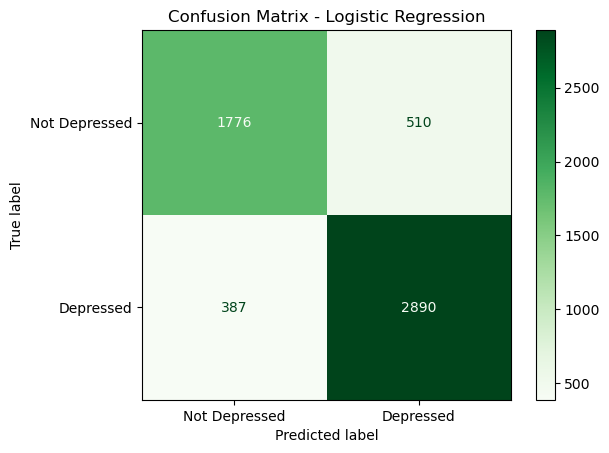

In [28]:
# Confusion Matrix
lr_cm = confusion_matrix(y_test, best_lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=["Not Depressed", "Depressed"])
disp.plot(cmap='Greens')
disp.ax_.set_title("Confusion Matrix - Logistic Regression")

#### Summary of the confusion matrices for the Logistic Regression model, with target variable

1. True Positives: 2,890 (Depressed correctly classified)
2. True Negatives: 1,776 (Not Depressed correctly classified)
3. False Positives: 510 (Not Depressed misclassified as Depressed)
4. False Negatives: 387 (Depressed misclassified as Not Depressed)

<a id="tree-metrics"></a> 

### **5.5.2 Decision Tree Classifier Metrics**

This section presents the evaluation metrics for the Decision Tree Classifier model, assessing its effectiveness in classifying depression status.

In [29]:
# Using RandomizedSearchCV on the Decision Tree Classifier to find the best parameters
tree_random_search = RandomizedSearchCV(
    estimator=tree,
    param_distributions={
        'criterion': ['gini', 'entropy', 'log_loss'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': [None, 'sqrt', 'log2'],
        'max_leaf_nodes': [None, 10, 20, 50, 100],
        'ccp_alpha': [0.0, 0.01, 0.1, 1.0],
        },
    cv=5,
    n_iter=50,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1)

# Fit the Randomized Search model
tree_random_search.fit(X_train,y_train) 

# Best parameters and best score
print("Best Decision Tree Parameters:", tree_random_search.best_params_)
print("Best Decision Tree Accuracy:", tree_random_search.best_score_)

Best Decision Tree Parameters: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_leaf_nodes': 100, 'max_features': None, 'max_depth': 30, 'criterion': 'gini', 'ccp_alpha': 0.0}
Best Decision Tree Accuracy: 0.8290416141808808


In [30]:
# Use the best estimator to predict
best_tree = tree_random_search.best_estimator_
best_tree_pred = best_tree.predict(X_test)

In [31]:
# Evaluate on training and test sets
best_tree_train_score = best_tree.score(X_train, y_train)
best_tree_test_score = best_tree.score(X_test, y_test)
best_tree_cv_score = cross_val_score(best_tree, X, y, cv=5, scoring='accuracy').mean()

print("Training Set Score for the best TREE :", best_tree_train_score)
print("Test Set Score for the best TREE:", best_tree_test_score)
print("Average Cross-Validation Score for the best TREE:", best_tree_cv_score)

Training Set Score for the best TREE : 0.8366814974607882
Test Set Score for the best TREE: 0.8326442566960274
Average Cross-Validation Score for the best TREE: 0.8307688538781981


#### Decision Tree Model Before and After Hyperparameter Tuning

| Metric                      | Before Hyperparameter Tuning | After Hyperparameter Tuning |
|-----------------------------|-----------------------------|-----------------------------|
| **Training Set Score**      | 85.76%                      | 83.67%                      |
| **Test Set Score**          | 81.23%                      | 83.26%                      |
| **Cross-Validation Score**  | 81.58%                      | 83.08%                      |

#### Analysis:

- **Training Set Score:** The training set score decreased from 85.76% to 83.67% after tuning, indicating a reduction in overfitting and better generalization.  
- **Test Set Score:** The test set score improved from 81.23% to 83.26%, showcasing a significant enhancement in performance on unseen data.  
- **Average Cross-Validation Score:** The average cross-validation score increased from 81.58% to 83.08%, reflecting more consistent performance across different validation folds after tuning.

#### Insights:

- **Improved Generalization:** The decrease in the training set score combined with an increase in test and cross-validation scores indicates that hyperparameter tuning reduced overfitting and made the model more robust.  
- **Better Test Performance:** A 2.03% improvement in the test score suggests the tuned model is more reliable when predicting new data.


In [32]:
# Classification report
print("Classification Report (Best Decision Tree):\n", classification_report(y_test, best_tree_pred))

Classification Report (Best Decision Tree):
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      2286
           1       0.84      0.88      0.86      3277

    accuracy                           0.83      5563
   macro avg       0.83      0.82      0.83      5563
weighted avg       0.83      0.83      0.83      5563



In [33]:
# Metrics per class for Decision Tree
best_tree_accuracy = accuracy_score(y_test, best_tree_pred)
best_tree_f1_0 = f1_score(y_test, best_tree_pred, pos_label=0)
best_tree_f1_1 = f1_score(y_test, best_tree_pred, pos_label=1)
best_tree_precision_0 = precision_score(y_test, best_tree_pred, pos_label=0)
best_tree_precision_1 = precision_score(y_test, best_tree_pred, pos_label=1)
best_tree_recall_0 = recall_score(y_test, best_tree_pred, pos_label=0)
best_tree_recall_1 = recall_score(y_test, best_tree_pred, pos_label=1)

print(f"Accuracy: {best_tree_accuracy}\n"
      f"F1-Score (Not Depressed): {best_tree_f1_0}, F1-Score (Depressed): {best_tree_f1_1}\n"
      f"Precision (Not Depressed): {best_tree_precision_0}, Precision (Depressed): {best_tree_precision_1}\n"
      f"Recall (Not Depressed): {best_tree_recall_0}, Recall (Depressed): {best_tree_recall_1}")

Accuracy: 0.8326442566960274
F1-Score (Not Depressed): 0.7886492622020431, F1-Score (Depressed): 0.8614789465853295
Precision (Not Depressed): 0.8197262859839547, Precision (Depressed): 0.8405923344947736
Recall (Not Depressed): 0.7598425196850394, Recall (Depressed): 0.8834299664327129


#### Decision Tree Model Predictions Before and After Hyperparameter Tuning

| Metric                      | Before Hyperparameter Tuning | After Hyperparameter Tuning |
|-----------------------------|-----------------------------|-----------------------------|
| **Accuracy**                | 81.23%                      | 83.26%                      |
| **Depressed F1-Score**      | 84.03%                      | 86.15%                      |
| **Not Depressed F1-Score**  | 77.25%                      | 78.86%                      |
| **Depressed Precision**     | 84.26%                      | 84.06%                      |
| **Depressed Recall**        | 83.80%                      | 88.34%                      |
| **Not Depressed Precision** | 76.95%                      | 81.97%                      |
| **Not Depressed Recall**    | 77.56%                      | 75.98%                      |

#### Analysis:

Accuracy: Accuracy improved from 81.23% to 83.26%, indicating better overall performance after tuning.

Depressed Class:

F1-Score: Increased from 84.03% to 86.15%, showing a significant boost in balance between precision and recall for predicting the "Depressed" class.
Precision: Slightly decreased from 84.26% to 84.06%, but this is offset by a substantial improvement in recall.
Recall: Improved notably from 83.80% to 88.34%, suggesting the model became better at identifying "Depressed" cases.

Not Depressed Class:

F1-Score: Improved from 77.25% to 78.86%, reflecting better handling of "Not Depressed" predictions.
Precision: Increased from 76.95% to 81.97%, indicating fewer false positives for "Not Depressed."
Recall: Slightly decreased from 77.56% to 75.98%, showing a minor trade-off in sensitivity for this class.


#### Insights:

Better "Depressed" Predictions: The tuned model shows significant improvement in detecting "Depressed" cases, especially in recall.
Balanced Trade-offs: While there’s a slight drop in recall for the "Not Depressed" class, the improvements in precision and overall F1-Score suggest a better balance.
Enhanced Accuracy: A 2.03% increase in accuracy highlights the effectiveness of hyperparameter tuning in improving the model's overall reliability.

#### For further analysis, the Decision Tree Classifier after hyperparameter tuning will be used as it demonstrates improved overall performance following hyperparameter tuning.

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

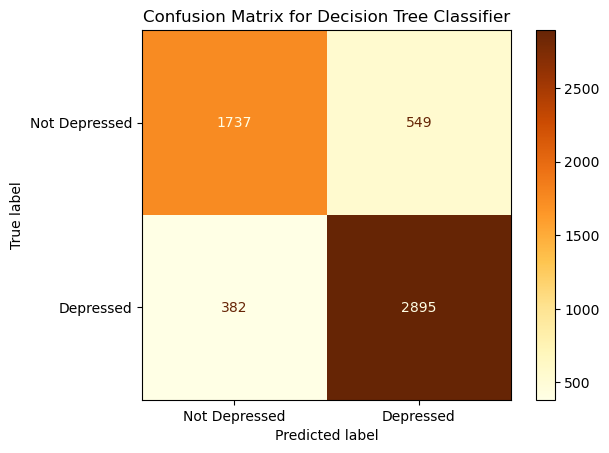

In [34]:
# Confusion Matrix for the best Decision Tree model
tree_cm = confusion_matrix(y_test, best_tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm, 
                              display_labels=["Not Depressed", "Depressed"])
disp.plot(cmap='YlOrBr')
disp.ax_.set_title("Confusion Matrix for Decision Tree Classifier")

#### Summary of the confusion matrices for the Decision Tree Classifier model, with target variable

1. True Positives: 2,895 (Depressed correctly classified)  
2. True Negatives: 1,737 (Not Depressed correctly classified)  
3. False Positives: 549 (Not Depressed misclassified as Depressed)  
4. False Negatives: 382 (Depressed misclassified as Not Depressed)

<a id="gb-metrics"></a> 

### **5.5.3 Gradient Boosting Classifier Metrics**

This section covers the performance metrics for the Gradient Boosting Classifier model in predicting depression.

In [35]:
# Using GridSearchCV on Gradient Boosting Classifier for best parameters
gb_grid_search = GridSearchCV(
    estimator=gb,
    param_grid={
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05],
        'max_depth': [3, 5],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [1, 3],
        'subsample': [0.8, 1.0],
        'max_features': ['sqrt', None]
    },
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the GridSearchCV model on training data
gb_grid_search.fit(X_train, y_train)

print(f"Best Gradient Boosting parameters: {gb_grid_search.best_params_}")
print(f"Best Gradient Boosting accuracy: {gb_grid_search.best_score_}")

Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best Gradient Boosting parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Gradient Boosting accuracy: 0.8365017302593142


In [36]:
# Best estimator after tuning
best_gb = gb_grid_search.best_estimator_

# Predict on test data
best_gb_pred = best_gb.predict(X_test)

In [37]:
# Testng the model on the Training Set to Underfitting Check.
best_gb_train_score = best_gb.score(X_train, y_train)
# Testng the model predictive ability on the Testing Set.
best_gb_test_score = best_gb.score(X_test, y_test)
# Running Cross Validation on the Dataset
best_gb_average_score = cross_val_score(best_gb, X, y, cv=5, scoring='accuracy').mean()

print("Training Set Score for the best GB :", best_gb_train_score)
print("Test Set Score for the best GB:", best_gb_test_score)
print("Average Cross-Validation Score for the best GB:", best_gb_average_score)

Training Set Score for the best GB : 0.8376252752685273
Test Set Score for the best GB: 0.8387560668703937
Average Cross-Validation Score for the best GB: 0.835874206879933


#### Comparison of Gradient Boosting Performance Before and After Hyperparameter Tuning

| Metric                         | Before Hyperparameter Tuning | After Hyperparameter Tuning |
|--------------------------------|-----------------------------|-----------------------------|
| **Training Set Score**         | 83.72%                      | 83.76%                      |
| **Test Set Score**             | 84.06%                      | 83.88%                      |
| **Average Cross-Validation Score** | 83.57%                      | 83.59%                      |

#### Analysis:

- **Training Set Score:** Slight improvement from 83.72% to 83.76%, indicating the tuned model performs slightly better on the training data.  
- **Test Set Score:** Minor decrease from 84.06% to 83.88%, suggesting a negligible change in the model's ability to generalize to unseen data.  
- **Average Cross-Validation Score:** Small improvement from 83.57% to 83.59%, reflecting marginal consistency across folds.

#### Insights:

- **Minimal Improvements:** The hyperparameter tuning yielded only marginal gains in training and cross-validation scores while slightly decreasing the test score.  
- **Stable Model:** These results suggest that the Gradient Boosting model was already well-optimized and the tuning process had minimal impact.

In [38]:
# Making a Classification Report for the Model
print("Classification Report (Best Gradient Boosting Classifier):\n", classification_report(y_test, best_gb_pred))

Classification Report (Best Gradient Boosting Classifier):
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      2286
           1       0.85      0.88      0.87      3277

    accuracy                           0.84      5563
   macro avg       0.84      0.83      0.83      5563
weighted avg       0.84      0.84      0.84      5563



In [39]:
# Class-wise metrics for Gradient Boosting
best_gb_accuracy = accuracy_score(y_test, best_gb_pred)
best_gb_f1_0 = f1_score(y_test, best_gb_pred, pos_label=0)
best_gb_f1_1 = f1_score(y_test, best_gb_pred, pos_label=1)
best_gb_precision_0 = precision_score(y_test, best_gb_pred, pos_label=0)
best_gb_precision_1 = precision_score(y_test, best_gb_pred, pos_label=1)
best_gb_recall_0 = recall_score(y_test, best_gb_pred, pos_label=0)
best_gb_recall_1 = recall_score(y_test, best_gb_pred, pos_label=1)

print(f"Accuracy: {best_gb_accuracy}\n"
      f"F1-Score (Not Depressed): {best_gb_f1_0}, F1-Score (Depressed): {best_gb_f1_1}\n"
      f"Precision (0): {best_gb_precision_0}, Precision (1): {best_gb_precision_1}\n"
      f"Recall (0): {best_gb_recall_0}, Recall (1): {best_gb_recall_1}")

Accuracy: 0.8387560668703937
F1-Score (Not Depressed): 0.79747121246331, F1-Score (Depressed): 0.8660594295953412
Precision (0): 0.8240783947736817, Precision (1): 0.847953216374269
Recall (0): 0.7725284339457568, Recall (1): 0.8849557522123894


#### Comparison of Gradient Boosting Predictions Before and After Hyperparameter Tuning

| Metric                     | Before Hyperparameter Tuning | After Hyperparameter Tuning |
|----------------------------|-----------------------------|-----------------------------|
| **Accuracy**               | 84.06%                      | 83.88%                      |
| **Depressed F1-Score**     | 86.74%                      | 86.61%                      |
| **Not Depressed F1-Score** | 80.02%                      | 79.75%                      |
| **Depressed Precision**    | 85.04%                      | 84.80%                      |
| **Depressed Recall**       | 88.49%                      | 88.50%                      |
| **Not Depressed Precision**| 82.49%                      | 82.41%                      |
| **Not Depressed Recall**   | 77.69%                      | 77.25%                      |

#### Analysis:

- **Accuracy:** Slight decrease from 84.06% to 83.88%, indicating minimal impact on overall accuracy after tuning.  
- **Depressed F1-Score:** Marginal decrease from 86.74% to 86.61%, showing consistency in identifying 'Depressed' cases.  
- **Not Depressed F1-Score:** Slight drop from 80.02% to 79.75%, reflecting a minor reduction in performance for 'Not Depressed' cases.  
- **Depressed Precision:** Slight decrease from 85.04% to 84.80%, indicating slightly reduced precision for 'Depressed' cases.  
- **Depressed Recall:** No change at 88.50%, maintaining the model's ability to identify 'Depressed' cases.  
- **Not Depressed Precision:** Slight decrease from 82.49% to 82.41%, with minimal impact.  
- **Not Depressed Recall:** Small decrease from 77.69% to 77.25%, indicating slightly reduced recall for 'Not Depressed' cases.

#### Insights:

- **Consistency:** The model's performance remains highly consistent for 'Depressed' predictions, as reflected in stable F1-Score, Precision, and Recall.  
- **Minimal Changes:** The reductions in 'Not Depressed' metrics suggest a negligible trade-off, with no significant degradation in predictive power.  
- **Robust Model:** The Gradient Boosting Classifier was well-optimized before tuning, with minimal scope for further improvement through hyperparameter adjustments.

#### For further analysis, the Gradient Boosting Classifier after hyperparameter tuning will be used. The tuned model reflects slight optimization in its parameters, making it a more refined choice for reliable and accurate predictions.

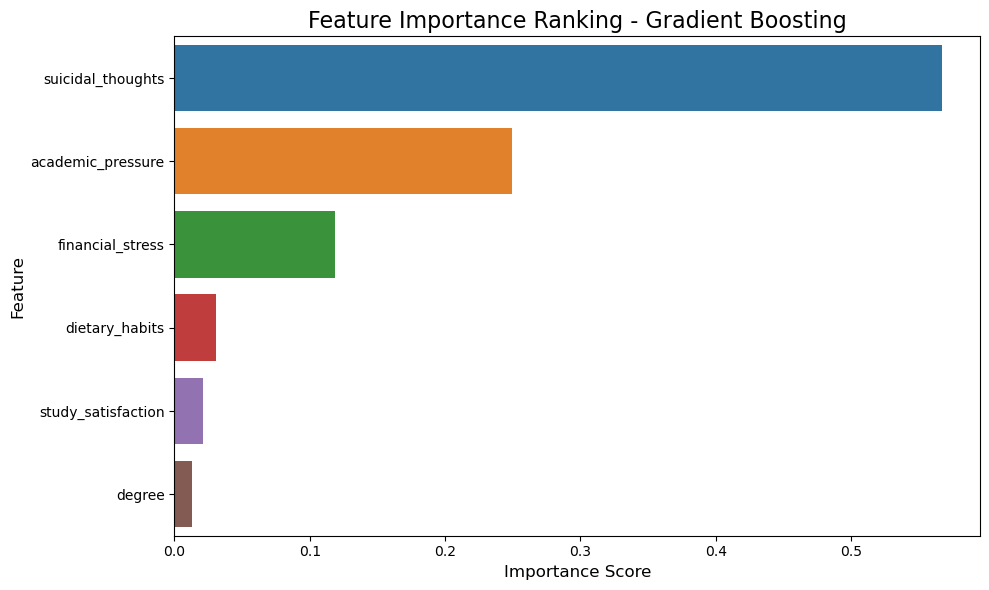

In [40]:
# Feature importance analysis
gb_importances = best_gb.feature_importances_
feature_names = X.columns
gb_data = pd.DataFrame({'Feature': feature_names, 'Importance': gb_importances})
gb_data = gb_data.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_data, hue='Feature', dodge=False)
plt.title('Feature Importance Ranking - Gradient Boosting', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

The feature importance plot for the Gradient Boosting Classifier highlights the contributions of various features toward predicting "Depression. Here's a summary:

Suicidal Thoughts:
This is the most significant predictor of Depression, with the highest importance score. It suggests that individuals experiencing suicidal thoughts strongly influence the model's ability to predict depression.

Academic Pressure:
This feature ranks second in importance, showing a notable contribution to depression prediction. High academic pressure may be a strong factor associated with depression levels.

Financial Stress:
Ranked third, financial stress significantly influences the prediction, confirming its role in mental health issues, as seen in the earlier correlation analysis.

Dietary Habits:
This feature contributes moderately to predictions. It implies that unhealthy dietary habits might play a role, though less critical than the top predictors.

Study Satisfaction:
This has a smaller but still relevant impact, indicating that lower satisfaction with studies might slightly contribute to depression.

Degree:
This feature has the least influence on the model's predictions, suggesting that the type or level of degree is not a strong determinant of depression in this dataset.

#### The Gradient Boosting model primarily relies on Suicidal Thoughts, Academic Pressure, and Financial Stress for predicting depression. Lifestyle and satisfaction variables, such as Dietary Habits and Study Satisfaction, contribute moderately. Educational factors like the Degree have minimal influence.

Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Classifier')

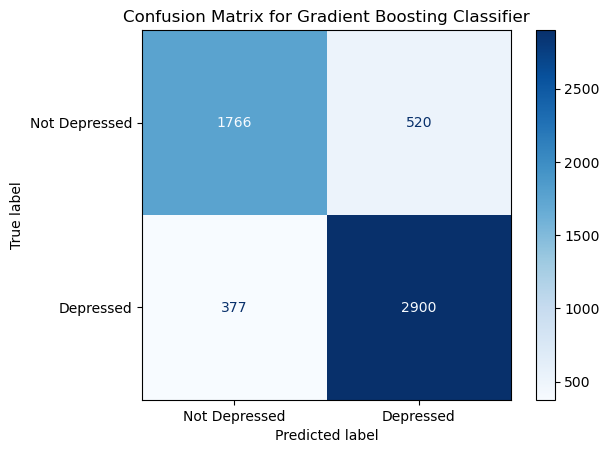

In [41]:
# Confusion Matrix for Gradient Boosting
gb_cm = confusion_matrix(y_test, best_gb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=gb_cm, 
                              display_labels=["Not Depressed", "Depressed"])
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix for Gradient Boosting Classifier")

#### Summary of the confusion matrices for the Gradient Boosting Classifier model, with target variable

1. True Positives (Depressed correctly classified): 2,900  
2. True Negatives (Not Depressed correctly classified): 1,766  
3. False Positives (Not Depressed misclassified as Depressed): 520  
4. False Negatives (Depressed misclassified as Not Depressed): 377

---

<a id="evaluation"></a> 

## **5.6 Model Evaluation and Comparison**  

Assess the models using performance metrics and visual tools.

Based on the comparison of the Gradient Boosting Classifier (GB), Decision Tree Classifier (TREE), and Logistic Regression (LR) models for predicting student depression, the Gradient Boosting Classifier emerges as the most balanced and effective model for further analysis. Here are the final observations:

#### Overall Performance:

The GB model achieves the highest cross-validation score (0.8359) and an accuracy of 83.88%, demonstrating consistent performance across training, testing, and validation phases.
The LR model has a slightly lower accuracy (83.88%) with a similar cross-validation score (0.8355), showing good reliability but marginally underperforming in comparison to GB.
The TREE model has the lowest cross-validation score (0.8308) and accuracy (83.26%), indicating slightly lower generalizability compared to GB and LR.

#### Class-Specific Metrics:

**Depressed Class**:
GB has the best balance between precision (0.8480) and recall (0.8850), resulting in the highest F1-score (0.8661), making it highly effective at identifying depressed students while minimizing false positives.
TREE achieves a slightly higher recall (0.8834) but at the cost of lower precision (0.8406), leading to more false positives and a slightly lower F1-score (0.8615).
LR provides similar performance to GB with slightly lower recall (0.8819) and F1-score (0.8657), making it a strong contender.

**Not Depressed Class**:
GB again maintains a strong balance with a precision of 0.8240 and recall of 0.7725.
TREE has higher precision (0.8197) but lower recall (0.7598), leading to slightly more false negatives.
LR demonstrates comparable performance to GB with precision (0.8211) and recall (0.7769).

#### Error Analysis:

The GB model has the lowest number of false negatives (377) for the depressed class, ensuring that fewer students at risk of depression are missed.
The TREE model has the highest false positives (549), which could lead to over-diagnosing non-depressed students as depressed.
The LR model has the lowest false positives (510) but slightly higher false negatives (387) than GB, which might lead to missing more at-risk students.


In this project, we successfully developed a machine learning solution to predict student depression using various classification models. Through exploratory data analysis, we identified key patterns and relationships in the dataset, enabling effective feature engineering. After evaluating multiple models, the Gradient Boosting Classifier emerged as the best-performing model due to its balanced performance, high accuracy, and ability to minimize false negatives, making it a reliable choice for identifying students at risk of depression.

#### Thank you, Feedback would be appreciated!!!